20
              worker  question  answer  truth  time
17     ABI0GL9ER3H1M        23       1      1     7
5     A3PM8L29POUPBQ        23       1      1    19
13    A1V6P1ZE6Q8YEW        23       1      1   609
4      A9KPCMO1J1LQF        23       1      1     7
18    A3K43RI91Y567E        23       1      1    36
...              ...       ...     ...    ...   ...
3345  A2JPOXYZM5AJZZ     10431       0      0    33
3351  A15HVZVDQAD0UJ     10431       0      0    60
3343  A2USD3XJ7TU9Y7     10431       0      0     9
3359  A1WRYUFOYFF8QO     10431       0      0   164
3350  A11VJ9HVZPID81     10431       1      0   177

[9500 rows x 5 columns]
143 & 500 & 9500 & 66.43$\pm$134.2 & 19.0$\pm$0.0 & 663
Pickled model loaded
Pickled model loaded
BEST AVAILABLE USER
0.892 0.952
t-test Ttest_relResult(statistic=-10.134033261095324, pvalue=1.111891606676476e-23)
z-score 0.20272121351984576
baseline below thresh 0.0
model below thresh 0.0
SMALLEST AVERAGE DISTANCE
0.892 0.942
t-test Ttest_relRes

100%|██████████| 500/500 [01:15<00:00,  6.65it/s]


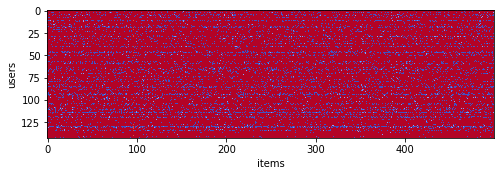

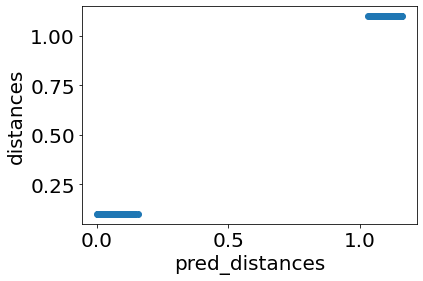

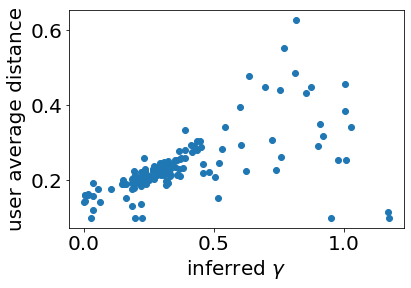

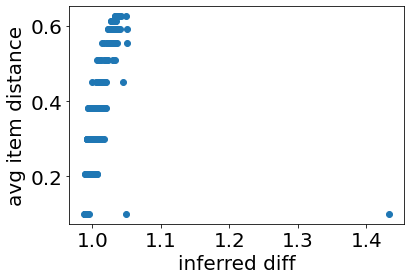

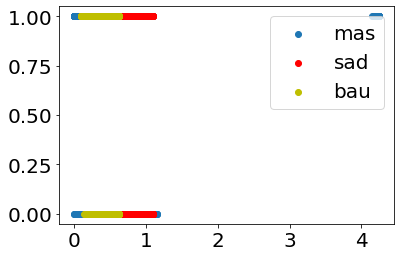

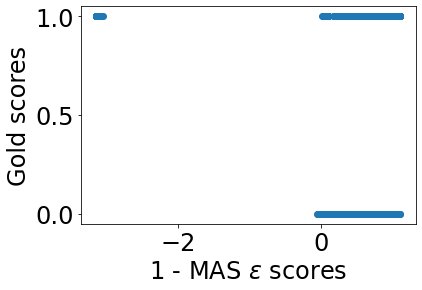

TypeError: 'list' object is not callable

In [2]:
import itertools

import numpy
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from pandas import DataFrame

import experiments
import utils
from granularity import *
from sklearn.metrics import f1_score, accuracy_score

input_df = pd.read_csv("movie.csv", sep=",")
truth_df = pd.read_csv("movie.csv")

annotation_df=DataFrame()
grouped_df = input_df.groupby('question')





minSamples=(numpy.min(input_df.groupby('question').size()))
print(minSamples)
dataRed = []
accSAD = []
accBAU = []
accMAS = []
w_f1_SAD = []
w_f1_BAU = []
w_f1_MAS = []
m_f1_SAD = []
m_f1_BAU = []
m_f1_MAS = []



def grapher():


    for i in range(1):
        dataRed.append(int((minSamples-1)-(4*i)))

        annotation_df = DataFrame()
        for q in grouped_df.groups:
            annotation_df = annotation_df.append(grouped_df.get_group(q).sample(int((minSamples-1)-(4*i))))

        print(annotation_df)

        dist_fn = lambda x, y: abs(x - y)

        eval_fn = lambda x, y: abs(1 - dist_fn(x, y))

        movie_exp = experiments.RealExperiment(eval_fn, "answer", "question", "worker", dist_fn)
        movie_exp.setup(annodf=annotation_df, golddf=truth_df, c_anno_uid="worker", c_anno_item="question",
                       c_anno_label="answer",
                       c_gold_item="question", c_gold_label="truth")

        movie_exp.describe_data()

        movie_exp.train()

        movie_exp.test(debug=True)
        _ = movie_exp.debug(plot_vs_gold=True, skip_miniplots=True)

        print("Weighted MAS F1 Score:")
        w_f1_MAS.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='weighted'))

        print("Weighted BAU F1 Score:")
        w_f1_BAU.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='weighted'))

        print("Weighted SAD F1 Score:")
        w_f1_SAD.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='weighted'))

        print("Macro MAS F1 Score:")
        m_f1_MAS.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), average='macro'))

        print("Macro BAU F1 Score:")
        m_f1_BAU.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), average='macro'))

        print("Macro SAD F1 Score:")
        m_f1_MAS.append(f1_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), average='macro'))

        print("Accuracy MAS Score:")
        accMAS.append(accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.mas_preds.values()), normalize=True))

        print("Accuracy BAU Score:")
        accBAU.append(accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.bau_preds.values()), normalize=True))

        print("Accuracy SAD Score:")
        accSAD.append(accuracy_score(list(movie_exp.golddict.values()), list(movie_exp.sad_preds.values()), normalize=True))

    dataRed.append(1)
    annotation_df = input_df.groupby('question').agg(lambda x: x.sample(1))
    accBAU.append(accuracy_score(annotation_df['truth'], annotation_df['answer'], normalize='True'))
    accSAD.append(accuracy_score(annotation_df['truth'], annotation_df['answer'], normalize='True'))
    accMAS.append(accuracy_score(annotation_df['truth'], annotation_df['answer'], normalize='True'))
    w_f1_MAS.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_SAD.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='macro'))
    w_f1_BAU.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='macro'))
    m_f1_MAS.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_SAD.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='weighted'))
    m_f1_BAU.append(f1_score(annotation_df['truth'], annotation_df['answer'], average='weighted'))



grapher()
accBAU*=100
accMAS*=100
accSAD*=100
w_f1_SAD*=100
w_f1_BAU*=100
w_f1_MAS*=100
m_f1_SAD *= 100
m_f1_BAU *= 100
m_f1_MAS*= 100













In [ ]:
plt.plot(dataRed,m_f1_SAD,label="SAD",color='o',marker='o')
plt.plot(dataRed,m_f1_MAS,label="MAS",color='b',marker='*')
plt.plot(dataRed,m_f1_BAU,label="BAU",color='g',marker='D')

plt.fill_between(dataRed,m_f1_SAD-np.std(m_f1_SAD),m_f1_SAD+np.std(m_f1_SAD),alpha=0.2,color='o')
plt.fill_between(dataRed,m_f1_MAS-np.std(m_f1_MAS),m_f1_MAS+np.std(m_f1_MAS),alpha=0.2,color='b')
plt.fill_between(dataRed,m_f1_BAU-np.std(m_f1_BAU),m_f1_BAU+np.std(m_f1_BAU),alpha=0.2,color='g')


plt.title("B_Movie (Macro F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Macro_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
plt.plot(dataRed,w_f1_SAD,label="SAD",color='o',marker='o')
plt.plot(dataRed,w_f1_MAS,label="MAS",color='b',marker='*')
plt.plot(dataRed,w_f1_BAU,label="BAU",color='g',marker='D')

plt.fill_between(dataRed,w_f1_SAD-np.std(w_f1_SAD),w_f1_SAD+np.std(w_f1_SAD),alpha=0.2,color='o')
plt.fill_between(dataRed,w_f1_MAS-np.std(w_f1_MAS),w_f1_MAS+np.std(w_f1_MAS),alpha=0.2,color='b')
plt.fill_between(dataRed,w_f1_BAU-np.std(w_f1_BAU),w_f1_BAU+np.std(w_f1_BAU),alpha=0.2,color='g')


plt.title("B_Movie (Weighted F1)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Weighted_F1 (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

plt.plot(dataRed,accSAD,label="SAD",color='o',marker='o')
plt.plot(dataRed,accMAS,label="MAS",color='b',marker='*')
plt.plot(dataRed,accBAU,label="BAU",color='g',marker='D')

plt.fill_between(dataRed,accSAD-np.std(accSAD),accSAD+np.std(accSAD),alpha=0.2,color='o')
plt.fill_between(dataRed,accMAS-np.std(accMAS),accMAS+np.std(accMAS),alpha=0.2,color='b')
plt.fill_between(dataRed,accBAU-np.std(accBAU),accBAU+np.std(accBAU),alpha=0.2,color='g')


plt.title("B_Movie (Accuracy)")
plt.xlabel("Data Redundancy (r)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

